
# Visión 360 de los clientes de Adventureworks: Análisis avanzado de datos de clientes



AdventureWorks es una empresa multinacional de fabricación que produce y distribuye bicicletas, piezas y accesorios para mercados comerciales en Norteamérica, Europa y Asia. En el marco de su proyecto de transformación digital AdventureWorks está llevando a cabo proyectos en distintos ámbitos entre los que se encuentra realizar un análisis 360 de sus clientes que le permita obtener conocimiento útil para la toma de decisiones y el diseño de nuevas estrategias comerciales.


Este proyecto se estructura en 4 etapas:

1. **Entendimiento de los datos**: Llevar a cabo un análisis descriptivo de los datos.

2. **Preparación de los datos**:Llevar a cabo la limpieza de datos, transformación y normalización.

3. **Modelado de datos**: Realizar una segmentación de sus clientes mediante el uso de técnicas de machine learning.

4. **Evaluación y obtención de resultados**: Evaluación del modelo y elaboración del informe de resultados.







### Descripción del conjunto de datos de clientes Adventureworks:

- **TotalAmount**: Presupuesto presentado al cliente
- **BikePurchase**: 0 - No Compra;
1 - Compra
- **CustomerID**: Identificador del cliente
- **PersonType**: Tipo de persona: IN
- **BirthDate**: Fecha de nacimiento
- **Age**: Edad
- **MaritalStatus**: Estado civil: M - Casado; S - Soltero
- **Gender**: Género. F - Femenino; M - Masculino
- **TotalChildren**: Número total de hijos
- **HomeOwnerFlag**: 0 - No cuenta con vivienda en propiedad;
1 - Cuenta con al menos una vivienda en propiedad
- **NumberCarsOwned**: Número de coches en propiedad
- **CountryRegionCode_Num**: Región geográfica a la que pertenece el cliente:0 - AU; 1 - CA; 2 - DE; 3 - FR; 4 - GB; 5 - US
- **YearlyIncome_Num**: Rango de ingresos anuales. 0 - 0-25000;
1 - 25001-50000; 2 - 50001-75000; 3 - 75001-100000; 4 - greater than 100000
- **Education_Num**: Nivel educativo: 0 - Partial High School;   
1 - High School; 2 - Partial College; 3 - Graduate Degree; 4 - Bachelors
- **Occupation_Num**: Ocupación profesional: 0 - Partial High School; 1 - High School; 2 - Partial College; 3 - Graduate Degree; 4 - Bachelors

# Etapa 1: Entendimiento de los datos


En esta etapa se llevará a cabo un análisis básico de los datos. Concretamente un análisis descriptivo en el que se identificará el número de variables que contiene el dataset, tipo de datos, principales medidas estadísticas y correlación entre variables entre otros aspectos.

In [ ]:
# Importamos las librerías necesarias
import numpy as np # Nos permite hacer calculos estadísticos como la media, mediana, hacer filtrados de datos...
import pandas as pd #Nos permite leer los datos en diferentes formatos, tratar valores faltantes, transformar datos....
from matplotlib import pyplot as plt # Permite hacer gráficos y visualizaciones como histogramas, diagramas de dispersión...
import seaborn as sns # Permite crear visualizaciones de una forma más sencilla, tiene temas prededifinidos para gráficos...
import plotly.express as px # Permite crear gráficos interactivos y hacerlo con menos código

In [ ]:
# Cargafrom google.colab import files
from google.colab import files
uploaded = files.upload()

Saving dataset_AW.csv to dataset_AW.csv


In [ ]:
# Leemos el dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['dataset_AW.csv']), sep = ',')
data.head(10)

,TotalAmount,BikePurchase,CustomerID,PersonType,BirthDate,Age,MaritalStatus,Gender,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num
0,8139.2900,1,11003,IN,1968,52,S,F,0,0,1,0,2,4,3
1,2994.0882,1,14501,IN,1938,82,M,M,4,1,2,5,3,3,4
2,4118.2600,1,21768,IN,1946,74,S,M,5,1,3,1,2,4,4
3,4631.1100,1,25863,IN,1946,74,S,F,5,1,3,5,1,1,3
4,3399.9900,1,28389,IN,1964,56,S,F,3,0,0,3,0,1,0
5,8121.3300,1,11005,IN,1965,55,S,M,0,1,1,0,2,4,3
6,8133.0400,1,11011,IN,1963,57,M,M,4,1,4,0,2,4,3
7,5938.2500,1,16624,IN,1972,48,S,M,0,0,3,0,3,4,3
8,6051.3100,1,27645,IN,1961,59,M,M,1,1,4,5,4,1,3
9,5873.2600,1,16351,IN,1954,66,S,F,2,0,2,0,3,2,1


In [ ]:
# Vemos el número de instancias y variables que tiene el dataset
data.shape

(18484, 15)

In [ ]:
# Generamos estadísticas descriptivas  de los datos
data.describe()

,TotalAmount,BikePurchase,CustomerID,BirthDate,Age,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,1588.329216,0.494049,20241.500000,1961.579961,58.420039,1.844352,0.676369,1.502705,3.100411,1.700335,2.402781,2.125784
std,2124.231717,0.499978,5336.015523,11.249188,11.249188,1.612408,0.467874,1.138394,1.992596,1.162898,1.299917,1.308386
min,2.290000,0.000000,11000.000000,1910.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.970000,0.000000,15620.750000,1954.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,270.265000,0.000000,20241.500000,1963.000000,57.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000
75%,2511.275000,1.000000,24862.250000,1970.000000,66.000000,3.000000,1.000000,2.000000,5.000000,2.000000,4.000000,3.000000
max,13295.380000,1.000000,29483.000000,1980.000000,110.000000,5.000000,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000



El dataset está compuesto por 15 variables (columnas) y 18484 observaciones o tuplas (filas).

Observando las medias de las variables podemos afirmar que el presupuesto medio que se le presenta al cliente es de 1588 u.m. y que prácticamente la mitad de los clientes de los que se compone el set, compra una bicicleta (0.494, bike purchase). La edad media de edad de los clientes es de 58 años y tienen entre 1 y 2 hijos, la mayoría dispone de vivienda en propiedad y suelen tener más de un coche.

La dispersión de las variables nos indica que el gasto presupuestado por cliente puede variar considerbalemente (desv. tipica 2124 u.m.), un hecho que es confirmado por los mínimos y máximos de la variable. Esto puede ser debido a la gran diferencia del presupuesto que se le presenta al cliente que compra una bicicleta frente al que simplemente compra accesorios. El análisis de la distribución por cuartiles nos confirma esta desigual distribución  del gasto, donde un 75% llega a las 2511 u.m de gasto, desviándose de la media en poco menos de 1000 u.m., mientras que el máximo de la distribución alcanza los 13295 u.m. lo que indica una clara presencia de outliers en esta variable.  

La edad también se ve afectada por una dispersión considerable ya que esta tiende a desviarse en 11 años desde la media. La edad mínima de los clientes es de 40 años mientras que el valor máximo de esta (110 años), nos indica que debe haber algunos datos erróneos en el dataset, dada la improbabilidad de esa cifra.

El cliente promedio tiene una renta anual que está entre la horquilla de 25001 y 75000 u.m. y su nivel educativo es de 'partial college'.

In [ ]:
#Vemos qué tipo de variables contiene el dataset y qué valores no contienen nulos
data.info()


El dataset contiene 12 variables numéricas, 1 decimal y 11 enteras, y 3 variables string de tipo object. Ninguna variable tiene valores faltantes.

In [ ]:
#Comprobamos los distintos valore que adopta la variable Education
print('Education_Num', data['Education_Num'].unique())

Education_Num [4 3 1 2 0]


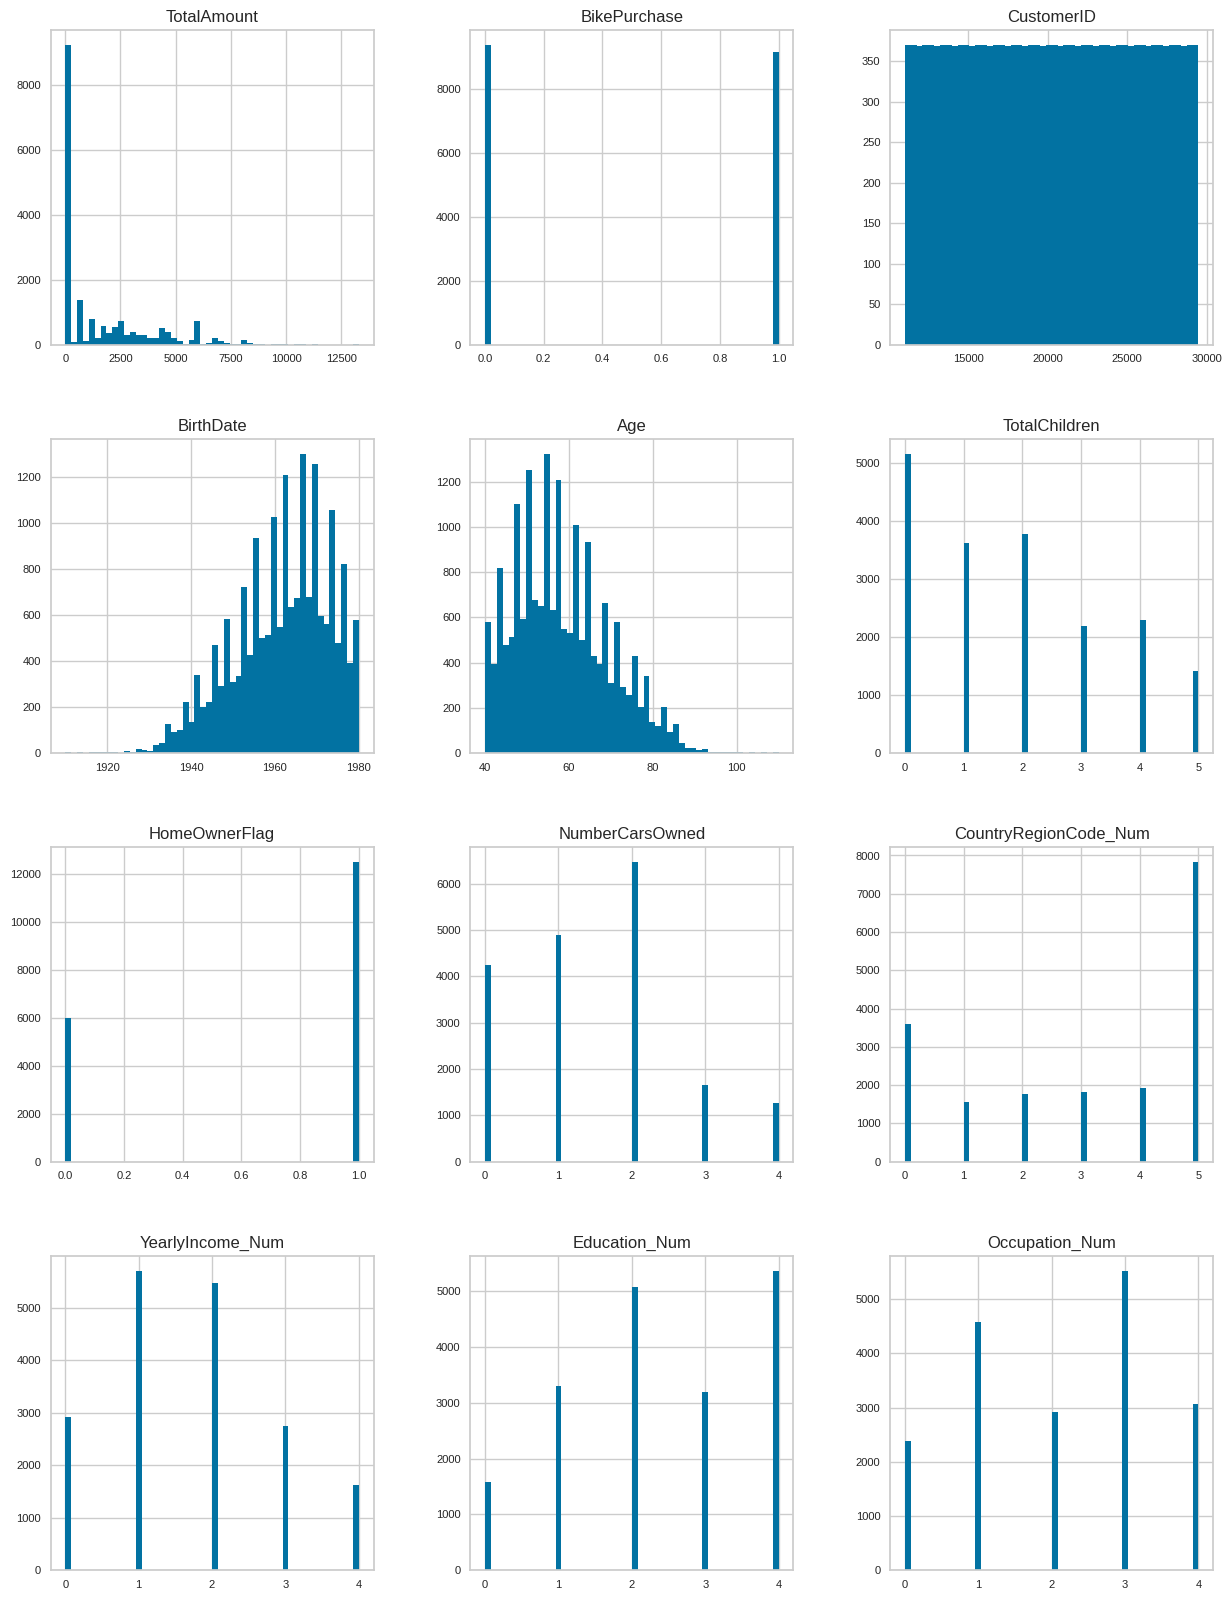

In [ ]:
#Visualizamos los histogramas de las variables numéricas para conocer su distribución
data.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8);

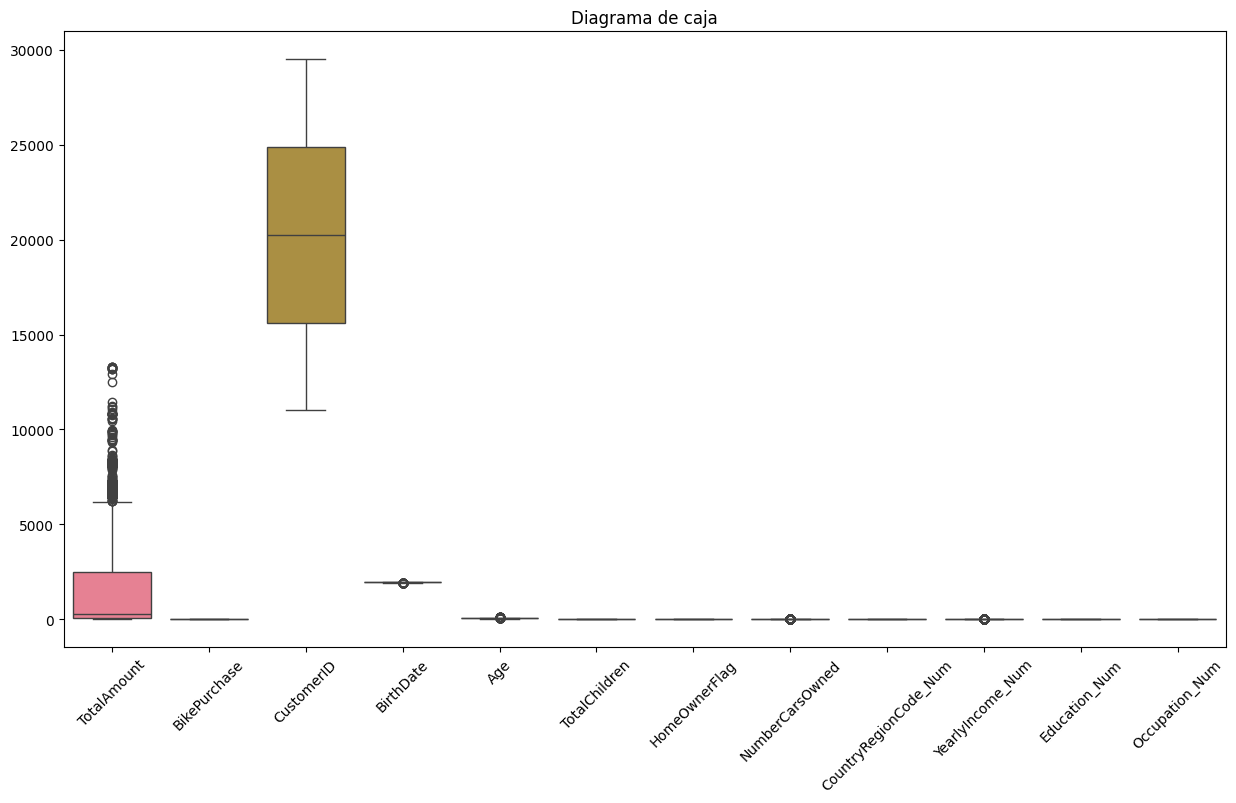

In [ ]:
# Visualizamos los outliers de las variables utilizando un boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Diagrama de caja')
plt.show()

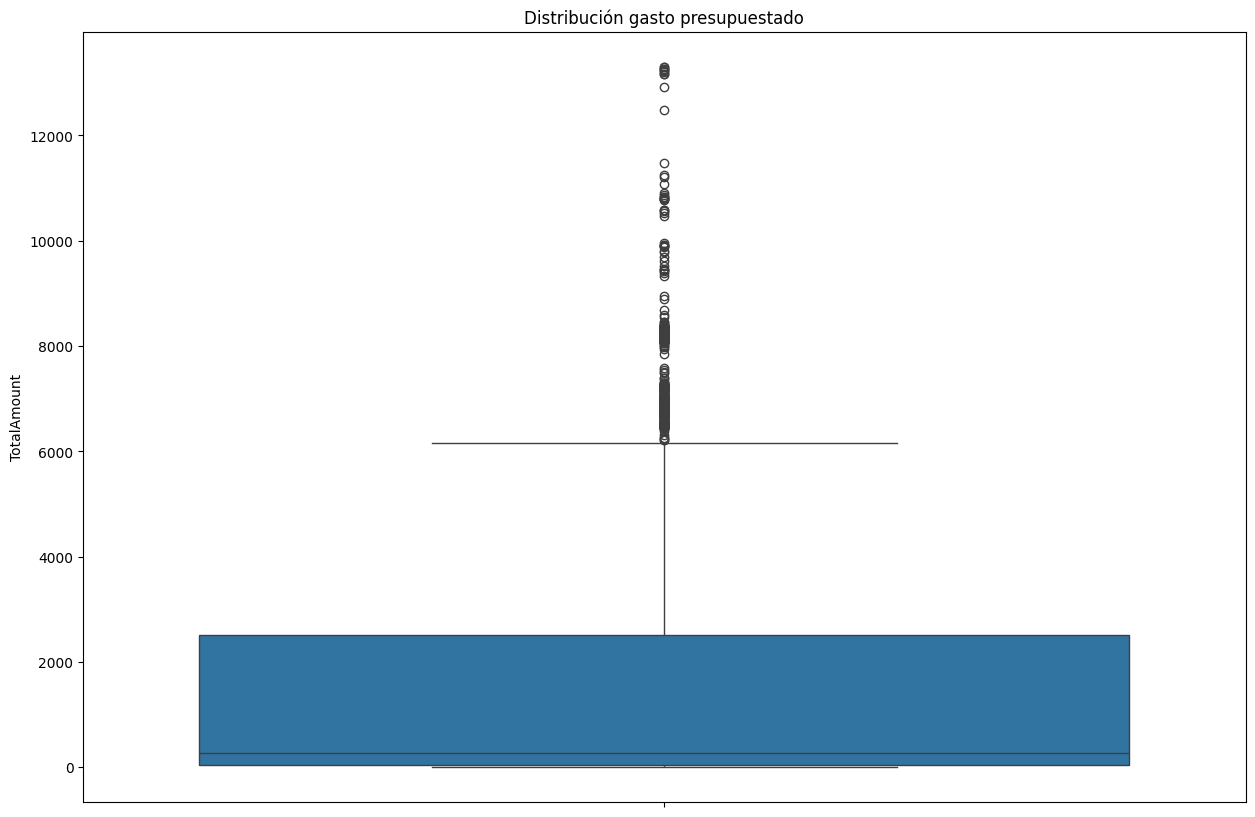

In [ ]:
# Visualizamos los outliers de la variable utilizando un boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data.TotalAmount)
plt.xticks(rotation=45)
plt.title('Distribución gasto presupuestado')
plt.ylabel('TotalAmount')
plt.show()

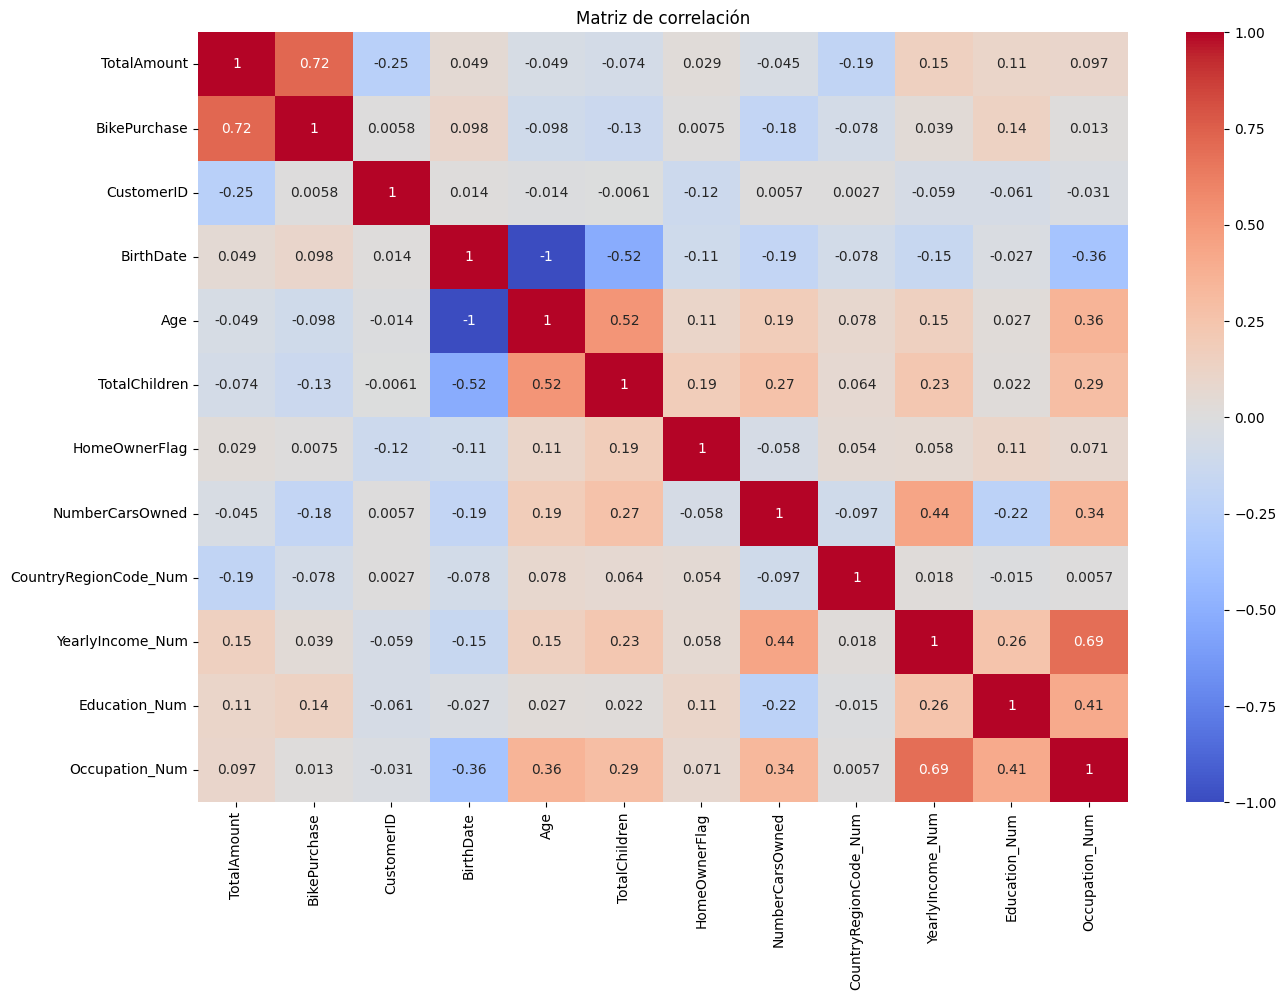

In [ ]:
#Realizamos la matriz de correlación entre las variables
df_mumeric = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_mumeric.corr(method = 'pearson')
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

# Etapa 2: Preparación de los datos
En esta etapa se llevarán a cabo tareas necesarias para obtener unos datos de calidad. Entre estas tareas se encuentran comprobar la existencia de valores nulos, identificar variables categóricas o transformar variables string a numéricas entre otras.

In [ ]:
#Visualizamos el total de valores nulos de cada variable del dataset
data.isnull().sum()

,0
TotalAmount,0
BikePurchase,0
CustomerID,0
PersonType,0
BirthDate,0
Age,0
MaritalStatus,0
Gender,0
TotalChildren,0
HomeOwnerFlag,0


 Consideramos eliminar las variables que no tienen interés para nuestro análisis. Estas variables son: CustomerID, PersonType (solo adquiere un valor) y BirthDate (ya disponemos de la variable edad) . Escribid el código necesario para eliminar dichas variables y posteriormente visualizar el dataset para ver si se han eliminado correctamente.

In [ ]:
## Eliminamos las columnas CustomerID,PersonType y BirthDate
data = data.drop('CustomerID', axis = 1)
data = data.drop('PersonType', axis = 1)
data = data.drop('BirthDate', axis = 1)
##Visualizamos el dataset para ver si están correctamente eliminadas
data.head(10)

,TotalAmount,BikePurchase,Age,MaritalStatus,Gender,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num
0,8139.2900,1,52,S,F,0,0,1,0,2,4,3
1,2994.0882,1,82,M,M,4,1,2,5,3,3,4
2,4118.2600,1,74,S,M,5,1,3,1,2,4,4
3,4631.1100,1,74,S,F,5,1,3,5,1,1,3
4,3399.9900,1,56,S,F,3,0,0,3,0,1,0
5,8121.3300,1,55,S,M,0,1,1,0,2,4,3
6,8133.0400,1,57,M,M,4,1,4,0,2,4,3
7,5938.2500,1,48,S,M,0,0,3,0,3,4,3
8,6051.3100,1,59,M,M,1,1,4,5,4,1,3
9,5873.2600,1,66,S,F,2,0,2,0,3,2,1


In [ ]:
# Observamos que la variable Gender es string. Comprobamos  los valores que adopta y su número de ocurrencias
data['Gender'].value_counts()

,count
Gender,
M,9351
F,9133


In [ ]:
# La convertimos en numérica. Para ello asignamos el valor 0 a al género femenino y 1 al género masculino
custom_mapping = {
    'F': 0,
    'M': 1
}

# Añadimos una nueva columna con los nuevos valores numéricos equivalentes. A esta nueva columna le llamaremos Gender_Num
data['Gender_Num'] = data['Gender'].map(custom_mapping)

In [ ]:
# Revisamos los valores de la nueva variable numérica resultante y su número de ocurrencias para
# comprobar la equivalencia con la variable original
data['Gender_Num'].value_counts()

,count
Gender_Num,
1,9351
0,9133


 Dado que hemos transformado la variable Gender en número, eliminamos la variable original tipo string. Escribid en la celda que se encuentra a continuación el código necesario para eliminar esa variable string original.

In [ ]:
## Eliminamos la columna original Gender con los valores tipo String
data = data.drop('Gender', axis = 1)
## Comprobamos que se ha eliminado correctamente
data.head(10)

,TotalAmount,BikePurchase,Age,MaritalStatus,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num,Gender_Num
0,8139.2900,1,52,S,0,0,1,0,2,4,3,0
1,2994.0882,1,82,M,4,1,2,5,3,3,4,1
2,4118.2600,1,74,S,5,1,3,1,2,4,4,1
3,4631.1100,1,74,S,5,1,3,5,1,1,3,0
4,3399.9900,1,56,S,3,0,0,3,0,1,0,0
5,8121.3300,1,55,S,0,1,1,0,2,4,3,1
6,8133.0400,1,57,M,4,1,4,0,2,4,3,1
7,5938.2500,1,48,S,0,0,3,0,3,4,3,1
8,6051.3100,1,59,M,1,1,4,5,4,1,3,1
9,5873.2600,1,66,S,2,0,2,0,3,2,1,0


In [ ]:
# Hacemos el mismo proceso con otra de las variables string: MaritalStatus. Comprobamos como antes los valores actuales de la variable y su número de ocurrencias
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
M,10011
S,8473


In [ ]:
# Asignamos el valor 0 a casado y 1 a soltero
custom_mapping = {
    'M': 0,
    'S': 1
}

# Añadimos una nueva columna con los nuevos valores numéricos equivalentes a la que llamamos MaritalStatus_Num
data['MaritalStatus_Num'] = data['MaritalStatus'].map(custom_mapping)

In [ ]:
# Revisamos los valores de la nueva variable numérica resultante y su número de ocurrencias para
# comprobar la equivalencia con la variable original
data['MaritalStatus_Num'].value_counts()

,count
MaritalStatus_Num,
0,10011
1,8473


 Una vez transformada la variable MaritalStatus en numérica será necesario eliminar la columna original. Escribid a continuación el código necesario para eliminarla y ver si se ha eliminado correctamente

In [ ]:
## Eliminamos la columna original MaritalStatus con los valores tipo String
data = data.drop('MaritalStatus', axis = 1)
## Comprobamos que se ha eliminado correctamente
data.head(10)

,TotalAmount,BikePurchase,Age,TotalChildren,HomeOwnerFlag,NumberCarsOwned,CountryRegionCode_Num,YearlyIncome_Num,Education_Num,Occupation_Num,Gender_Num,MaritalStatus_Num
0,8139.2900,1,52,0,0,1,0,2,4,3,0,1
1,2994.0882,1,82,4,1,2,5,3,3,4,1,0
2,4118.2600,1,74,5,1,3,1,2,4,4,1,1
3,4631.1100,1,74,5,1,3,5,1,1,3,0,1
4,3399.9900,1,56,3,0,0,3,0,1,0,0,1
5,8121.3300,1,55,0,1,1,0,2,4,3,1,1
6,8133.0400,1,57,4,1,4,0,2,4,3,1,0
7,5938.2500,1,48,0,0,3,0,3,4,3,1,1
8,6051.3100,1,59,1,1,4,5,4,1,3,1,0
9,5873.2600,1,66,2,0,2,0,3,2,1,0,1


# Etapa 3. Modelado de datos

En esta etapa se llevará a cabo un modelado de datos que permita **segmentar** la base de clientes en grupos que compartan características similares. Esta agrupación de clientes o **clustering** permitirá a la compañía personalizar sus estrategias comerciales orientandolas a un público objetivo específico y maximizar sus resultados. Para llevar a cabo esta segmentacion se utilizará la técnica de aprendizaje automático no supervisado **k-means**.

In [ ]:
# Importamos las librerías necesarias
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
#Seleccionamos las columnas que emplearemos para la agrupacion y creamos un nuevo dataset con esas columnas al que llamaremos data_cluster.
seleccion_columnas = ['BikePurchase', 'TotalAmount', 'TotalChildren', 'Education_Num', 'Occupation_Num', 'YearlyIncome_Num']
data_cluster = data[seleccion_columnas]
data_cluster.head(10)

,BikePurchase,TotalAmount,TotalChildren,Education_Num,Occupation_Num,YearlyIncome_Num
0,1,8139.2900,0,4,3,2
1,1,2994.0882,4,3,4,3
2,1,4118.2600,5,4,4,2
3,1,4631.1100,5,1,3,1
4,1,3399.9900,3,1,0,0
5,1,8121.3300,0,4,3,2
6,1,8133.0400,4,4,3,2
7,1,5938.2500,0,4,3,3
8,1,6051.3100,1,1,3,4
9,1,5873.2600,2,2,1,3


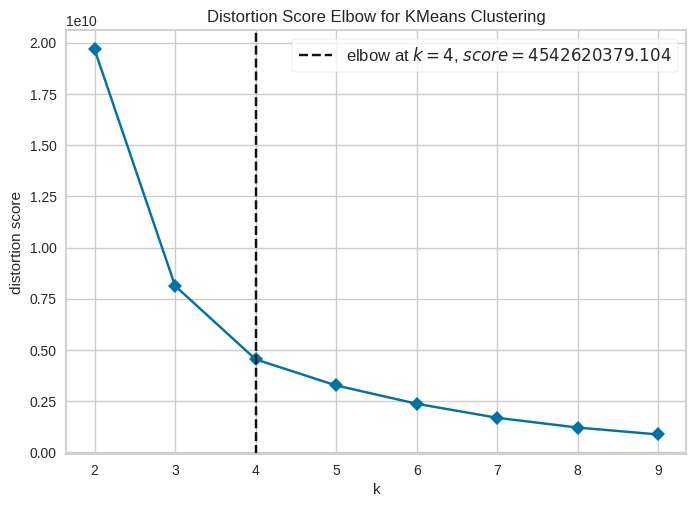

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# # Calculamos el número óptimo de clusters usando el método del codo
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(data_cluster)
visualizer.show()

In [ ]:
# Aplicamos K-Means con número de clusters = 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_cluster)

In [ ]:
# Agregamos la columna de clusters a data_cluster (el nuevo dataset).
data_cluster['Cluster'] = clusters

<ipython-input-26-1544315729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['Cluster'] = clusters


In [ ]:
#Comprobamos que se ha añadido la columna cluster correctamente
data_cluster.head(10)

,BikePurchase,TotalAmount,TotalChildren,Education_Num,Occupation_Num,YearlyIncome_Num,Cluster
0,1,8139.2900,0,4,3,2,2
1,1,2994.0882,4,3,4,3,1
2,1,4118.2600,5,4,4,2,3
3,1,4631.1100,5,1,3,1,3
4,1,3399.9900,3,1,0,0,3
5,1,8121.3300,0,4,3,2,2
6,1,8133.0400,4,4,3,2,2
7,1,5938.2500,0,4,3,3,2
8,1,6051.3100,1,1,3,4,2
9,1,5873.2600,2,2,1,3,2


In [ ]:
# Obtenemos estadísticas descriptivas para cada cluster : Cluster 0, cluster 1, cluster 2 y cluster 3
cluster_stats = data_cluster.groupby('Cluster').describe().transpose()

# Mostramos las estadísticas descriptivas
print(cluster_stats)

Cluster                            0            1             2            3
BikePurchase     count  11424.000000  3357.000000   1580.000000  2123.000000
                 mean       0.181898     0.998213      1.000000     1.000000
                 std        0.385777     0.042245      0.000000     0.000000
                 min        0.000000     0.000000      1.000000     1.000000
                 25%        0.000000     1.000000      1.000000     1.000000
                 50%        0.000000     1.000000      1.000000     1.000000
                 75%        0.000000     1.000000      1.000000     1.000000
                 max        1.000000     1.000000      1.000000     1.000000
TotalAmount      count  11424.000000  3357.000000   1580.000000  2123.000000
                 mean     196.949671  2261.990807   6620.269201  4265.282948
                 std      304.621473   526.829591   1104.606245   542.455518
                 min        2.290000  1229.960000   5512.260000  3266.810000

In [ ]:
# Agrupamos los datos por las etiquetas de los clusters y calculamos la media para cada grupo
cluster_means = data_cluster.groupby('Cluster').mean()

# Mostramos las medias
print(cluster_means)

         BikePurchase  TotalAmount  TotalChildren  Education_Num  \
Cluster                                                            
0            0.181898   196.949671       1.963848       2.285452   
1            0.998213  2261.990807       1.637176       2.568067   
2            1.000000  6620.269201       1.664557       2.622785   
3            1.000000  4265.282948       1.662741       2.609044   

         Occupation_Num  YearlyIncome_Num  
Cluster                                    
0              2.060049          1.609156  
1              2.095025          1.670539  
2              2.533544          2.289873  
3              2.224682          1.799341  


**Clusters**

Los 4 clusters agrupan clientes que se diferencian, principalmente, por el importe gastado.

En primer lugar, los clientes del cluster 0 se caracterizan por no comprar bicicletas (o muy pocos lo hacen), lo que hace que estos clientes gasten de media poco menos de 200 u.m., siendo el cluster que menos gasta. Estos clientes suelen tener 2 hijos de media y un nivel educativo de "partial college". Se suelen situar en la horquilla de renta de entre 25001 y 75000 u.m.

Los clusteres 1 y 3 son bastante similares, ya que la media del nº de hijos y el nivel ediucativo presentan bastantes similitudes. No obstante, el gasto medio entre los dos grupos difiere en unos 2000 u.m de media (cluster 1 2261 um y cluster 3 4265 um), lo que viene explicado por la ligera diferencia en los puestos que ocupan a nivel laboral, lo que los sitúa en horquillas de renta en ligeramente diferentes. En consecuencia, el cluster que en este caso gasta más, es también el que dispone de una renta ligeramente mayor (cluster 3).

Los individuos situados dentro del cluster 2, son los que muestran el gasto el mas elevado. Es cierto que el grupo muestra similitudes con los clusteres 1 y 3 en términos de nivel educativo o nº de hijos pero difiere con estos en términos de ocupación (suelen ocupar puestos más a nivel directivo) y en renta anual, siendo el grupo más "pudiente" en este sentido.

# Etapa 4: Evaluación y presentacion de resultados

En esta etapa evaluamos la calidad del clustering con el método de Silhoutte y se realiza un informe de resultados que incluya entre otros aspectos la descripción del problema a resolver, la descripción de los pasos seguidos en el proyecto de análisis, conclusiones del análisis de variables y utilidad y aplicacion de este modelado en el ámbito del diseño de nuevas estrategias comerciales.

In [ ]:
## Importamos las librerías necearias para evaluar la calidad de los clusteres generados con el coeficiente de Silhouette

from sklearn.metrics import silhouette_score, silhouette_samples

Puntuación media del coeficiente de Silhouette:0.7467198082500357


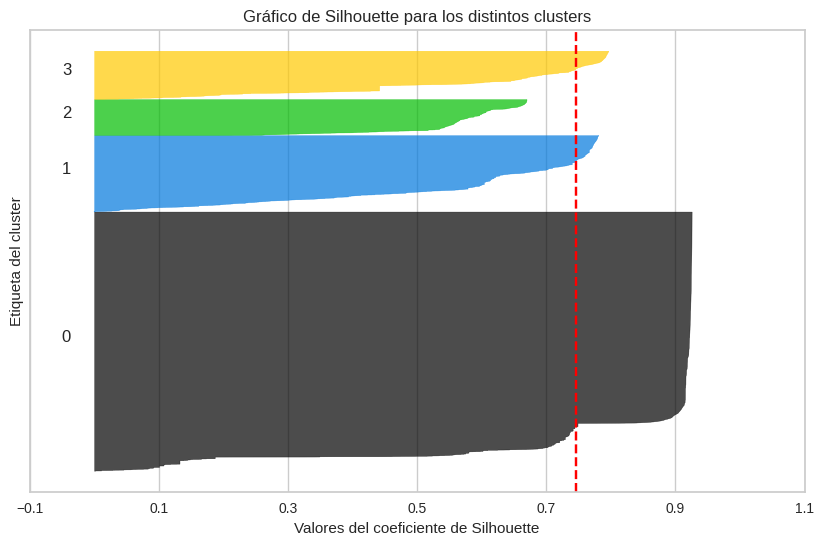

In [ ]:
## Evaluamos la calidad de los clusteres generados con Silhouette
silhouette_avg = silhouette_score(data_cluster[seleccion_columnas], data_cluster['Cluster'])
print(f"Puntuación media del coeficiente de Silhouette:{silhouette_avg}")

# Calculamos las puntuaciones de Silhouette para cada punto
sample_silhouette_values = silhouette_samples(data_cluster[seleccion_columnas], data_cluster['Cluster'])

# Crear un gráfico de Silhouette
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# El rango del eje y se basa en el número de clusters, multiplicado por el tamaño de los datos
y_lower = 10
for i in range(4):
    # Agregar las puntuaciones de Silhouette para los puntos en el cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[data_cluster['Cluster'] == i]

    # Ordenar las puntuaciones de Silhouette dentro del cluster
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiqueta del cluster en el gráfico de Silhouette
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Computar el nuevo y_lower para la siguiente trama
    y_lower = y_upper + 10  # 10 para el espacio en blanco entre los plots

ax1.set_title("Gráfico de Silhouette para los distintos clusters")
ax1.set_xlabel("Valores del coeficiente de Silhouette")
ax1.set_ylabel("Etiqueta del cluster")

# La línea vertical roja para la puntuación media del coeficiente de Silhouette
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Limpiar el eje y
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()

El coeficiente es muy próximo a 1 (0,748), lo que indica que los clusters están relativamente bien agrupados, siendo formados cada uno por las observaciones que comparten semejanzas en las variables que hemos incluido en la clusterización.

**Elaboración de un informe de resultados y conclusiones del proyecto que contenga los siguientes puntos:**


- Descripción del problema a resolver (predicción, clasificación, agrupamiento...)
- Objetivos que persigue el análisis (cuáles y para que fin)
- Análisis de las características más relevantes de los datos y su distribución (visualizaciones clave, medidas estadísticas relaciones entre variables...)
- Detalle del proceso de preparación de los datos (cómo se ha llevado a cabo el proceso de transformación, jusificación de las transformaciones realizadas...)
- Descripción del modelo de datos (qué técnicas se han utilizado, pasos del proceso de modelado, cómo se ha obtenido el número óptimo de clusteres...)
- Conclusiones y resultados (descripción de las características de la segmentación realizada, beneficios que puede aportar al diseño de estrategias comerciales, lanzamiento de campañas de marketing...)


**Informe**:

En el caso propuesto, se plantea un problema de agrupamiento. Se pretende segmentar los clientes de la muestra de AdventureWorks en base a un conjunto de variables sociodemográficas y socioeconómicas, con el fin de poder orientar mejor las estrategias comerciales.

El análisis pretende, por una parte, comprender cómo son los datos que componen la muestra, para así identificar la tipología de las variables y su distribución. A través de un análisis descriptivo, podemos identificar las necesidades de preparación previa al modelado que puedan tener estos datos, por ejemplo, si existen datos anómalos o si hay que transformar variables.
Por otra parte, se persigue agrupar las distintas tipologías del cliente que adquiere productos en AdventureWorks, identificando características comunes dentro de la distribución, con el objetivo de segmentar a los distintos compradores en perfiles y así poder orientar de manera más eficaz las estrategias comerciales.

Los datos de los que disponemos se componen por 15 variables y 18.484 observaciones. La media de edad de los clientes de la muestra es de 58 años, con una distribución que se centra bastante en este valor. La mayoría de los individuos tienen al menos un hijo y son propietarios de una vivienda. El nivel de educación medio de los individuos se encuentra entre el “partial college” y el “bachelor’s degree” y la mayoría se sitúan en un nivel de renta que oscila entre 25000 um y 75000 um anuales.

Existe una fuerte correlación positiva entre la variable del gasto y la variable que indica si compran una bicicleta. No se observa alguna otra correlación (positiva o negativa) relevante entre la variable del gasto y el resto. Por otro lado, vemos una correlación positiva considerable entre la variable de ocupación y la de renta anual.

En cuanto al proceso de preparación de los datos, en primer lugar, nos centramos en entender los datos, para comprobar si existe alguna “irregularidad” a solventar, como podrían ser “outliers”, valores nulos, necesidad de transformación de variables, etc. Esto lo conseguimos mediante un análisis descriptivo, obteniendo estadísticos generales como la media, desviación típica, máximo, mínimo y la distribución por cuartiles. También hemos realizado diagramas de caja para comprobar si existen “outliers” dentro de las variables de la muestra. Como resultado de este proceso, no observamos ningún valor faltante en ninguna variable, pero sí que existen “outliers” en la variable del gasto total. También realizamos la matriz de correlación, para comprobar cómo se relacionan entre sí las variables.

Después de este proceso, consideramos necesario eliminar algunas irrelevantes para el modelo. Estas son CustomerID y PersonType, ya que solo sirven como identificador y no aportan ninguna información relevante y BirthDate, ya que es redundante al ya disponer de una variable que indica edad.
También consideramos necesario transformar las variables categóricas de tipo texto en variables numéricas discretas, para que el modelo funcione mejor.  Esta transformación fue llevada a cabo para las variables “MaritalStatus” y “Gender”.

Para el modelado de datos, se utilizó el algoritmo de aprendizaje no supervisado “kmeans” con el fin de segmentar la muestra mediante la agrupación (o clusterización) de clientes con características similares.
Con este fin, seleccionamos las variables que usaría el modelo para agrupar los datos. Estas son: “BikePurchase”, “TotalAmount”, “TotalChildren”, “Education_Num”, “Occupation_Num” y “YearlyIncome_Num”. Acto seguido, calculamos el número óptimo de clusteres utilizando el método del codo, resultando en un total de 4 clústeres. Ejecutamos el algoritmo y nos segmenta la base de datos en 4 clústeres agrupados por similitudes en las variables seleccionadas. Para acabar con el modelado, comprobamos la calidad de la segmentación mediante el coeficiente de Silhouette, resultando en una segmentación bastante acertada, ya que dicho coeficiente se acerca considerablemente a 1 (0,748). No obstante, es posible que la puntuación para uno de los clústeres no sea del todo buena, concretamente el clúster 2 no alcanza a superar dicho coeficiente, por lo que la segmentación de esta parte de la muestra puede que no sea la más acertada.

En conclusión, la segmentación ha resultado en 4 agrupaciones distintas de clientes, que se diferencian en el gasto efectuado explicado por ciertas características socioeconómicas y sociodemográficas comunes. Debido a la buena segmentación que nos da el modelo, las estrategias de marketing se pueden enfocar de una manera más específica a los diferentes tipos de clientes adaptándose a sus características, maximizando la rentabilidad y optimizando los recursos.

Así mismo, el análisis ha permitido generar información valiosa para la toma de decisiones comerciales y el diseño de campañas de marketing permitiendo orientar campañas personalizadas según el perfil del cliente, facilitando el diseño de productos adaptados a cada segmento y, de esta manera, mejorar el retorno de inversión de las campañas mediante una mejor asignación de recursos comerciales. Todo esto, ofrece una visión más completa y basada en datos del cliente, fundamental para una estrategia de CRM efectiva.





